# ML Data Processing

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/kaggle/input/titaniccsv/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## See Duplicates

In [2]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Categorical & Numerical columns

In [4]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


## Number of Unique values in categorical columns: nunique()

In [5]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

## Removal of all Above Unwanted Observations
- This includes deleting duplicate/ redundant or irrelevant values from your dataset. Duplicate observations most frequently arise during data collection and Irrelevant observations are those that don’t actually fit the specific problem that you’re trying to solve. 

- Redundant observations alter the efficiency to a great extent as the data repeats and may add towards the correct side or towards the incorrect side, thereby producing unfaithful results.
Irrelevant observations are any type of data that is of no use to us and can be removed directly.
Now we have to make a decision according to the subject of analysis, which factor is important for our discussion.

- As we know our machines don’t understand the text data. So, we have to either drop or convert the categorical column values into numerical types. Here we are dropping the Name columns because the Name will be always unique and it hasn’t a great influence on target variables. For the ticket, Let’s first print the 50 unique tickets.

In [6]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

From the above tickets, we can observe that it is made of two like first values ‘A/5 21171’ is joint from of ‘A/5’ and  ‘21171’ this may influence our target variables. It will the case of Feature Engineering. where we derived new features from a column or a group of columns. In the current case, we are dropping the “Name” and “Ticket” columns.

## Drop Name and Ticket Columns

In [7]:
df1 = df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

## Handling Missing Data
- Missing data is a common issue in real-world datasets, and it can occur due to various reasons such as human errors, system failures, or data collection issues. Various techniques can be used to handle missing data, such as `imputation, deletion, or substitution`.

- Let’s check the % missing values columns-wise for each row using `df.isnull()` it checks whether the values are null or not and gives returns `boolean` values. and .sum() will `sum the total number of null values rows` and we divide it by the total number of rows present in the dataset then we multiply to get values in % i.e per 100 values how much values are null.

In [8]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

- We cannot just ignore or remove the missing observation. They must be handled carefully as they can be an indication of something important. 

## The two most common ways to deal with missing data are:
- `Dropping Observations` with `missing` values.
- The fact that the value was missing may be `informative in itself`.
- Plus, in the real world, you often need to make predictions on new data even if some of the features are missing!
- As we can see from the above result that Cabin has 77% null values and Age has 19.87% and Embarked has 0.22% of null values.

- So, it’s `not a good` idea to `fill 77% of null` values. So, we will drop the Cabin column. Embarked column has only 0.22% of null values so, we `drop the null values rows` of Embarked column.

In [9]:
print(f"df1.shape:{df1.shape}")
# drop column Cabin
df2 = df1.drop(columns='Cabin')

# Drop rows in which Embarked field is null (drop-na)
df2.dropna(subset=['Embarked'], axis=0, inplace=True)

print(f"df2.shape:{df2.shape}")

df1.shape:(891, 10)
df2.shape:(889, 9)


- dropna() is used to remove rows or columns with missing values (NaN)
- while fillna() is used to fill those missing values with a specified value or method.
- The dropna() method without any parameters removes all rows containing any missing values (NaN) across all columns.

```py
# importing pandas package
import pandas as pd

# making data frame from csv file
data = pd.read_csv("nba.csv")

# sorting dataframe
data.sort_values("Team", inplace=True)

# making boolean series for a team name
filter1 = data["Team"] == "Atlanta Hawks"

# making boolean series for age
filter2 = data["Age"] > 24

# filtering data on basis of both filters
data.where(filter1 & filter2, inplace=True)

# display
data

```

## Imputing the missing values from past observations
- Again, `missingness` is almost always informative in itself, and you should tell your algorithm if a value was missing.
- Even if you build a model to impute your values, you’re not adding any real information. You’re just reinforcing the patterns already provided by other features.
- We can use Mean imputation or Median imputations for the case.

- Note: 

- `Mean imputation` is suitable when the data is `normally distributed` and has `no extreme outliers`.
- `Median imputation` is preferable when the data contains `outliers or is skewed`.

## Mean imputation

In [10]:
# Mean imputation
df3 = df2.fillna(df2.Age.mean())
# Let's check the null values again

print( df3.isnull().head() )
display( df3.isnull().head() )
print( df3.isnull().sum() )

   PassengerId  Survived  Pclass    Sex    Age  SibSp  Parch   Fare  Embarked
0        False     False   False  False  False  False  False  False     False
1        False     False   False  False  False  False  False  False     False
2        False     False   False  False  False  False  False  False     False
3        False     False   False  False  False  False  False  False     False
4        False     False   False  False  False  False  False  False     False


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


## Handling Outliers
- Outliers are extreme values that deviate significantly from the majority of the data. They can negatively impact the analysis and model performance. Techniques such as clustering, interpolation, or transformation can be used to handle outliers.

- To check the outliers, We generally use a box plot. A box plot, also referred to as a box-and-whisker plot, is a graphical representation of a dataset’s distribution. It shows a variable’s median, quartiles, and potential outliers. The line inside the box denotes the median, while the box itself denotes the interquartile range (IQR). The whiskers extend to the most extreme non-outlier values within 1.5 times the IQR. Individual points beyond the whiskers are considered potential outliers. A box plot offers an easy-to-understand overview of the range of the data and makes it possible to identify outliers or skewness in the distribution.

- Let’s plot the box plot for Age column data.

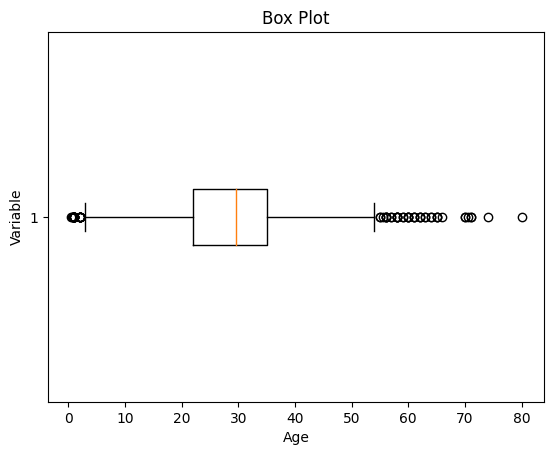

In [11]:
import matplotlib.pyplot as plt

plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

As we can see from the above Box and whisker plot, Our age dataset has outliers values. The values less than 5 and more than 55 are outliers.

In [12]:
# calculate summary statistics
mean = df3['Age'].mean()
std  = df3['Age'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound) 
                & (df3['Age'] <= upper_bound)]

Lower Bound : 3.7054001079256587
Upper Bound : 55.57878528533277


## Similarly, we can remove the outliers of the remaining columns.

### Data Transformation 
Data transformation involves converting the data from one form to another to make it more suitable for analysis. Techniques such as normalization, scaling, or encoding can be used to transform the data.

### Data validation and verification
Data validation and verification involve ensuring that the data is accurate and consistent by comparing it with external sources or expert knowledge. 

<br>
For the machine learning prediction, First, we separate independent and target features. Here we will consider only ‘Sex’ ‘Age’ ‘SibSp’, ‘Parch’ ‘Fare’ ‘Embarked’ only as the independent features and Survived as target variables. Because PassengerId will not affect the survival rate.

In [13]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']
display( X.head() )
display( Y.head() )

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Data formatting
Data formatting involves converting the data into a standard format or structure that can be easily processed by the algorithms or models used for analysis. Here we will discuss commonly used data formatting techniques i.e. Scaling and Normalization.

### Scaling

Scaling involves transforming the values of features to a specific range. It maintains the shape of the original distribution while changing the scale.
Particularly useful when features have different scales, and certain algorithms are sensitive to the magnitude of the features.
Common scaling methods include Min-Max scaling and Standardization (Z-score scaling).

### Min-Max Scaling: 
Min-Max scaling rescales the values to a specified range, typically between 0 and 1. It preserves the original distribution and ensures that the `minimum value maps to 0 and the maximum value maps to 1`.


In [14]:
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

<ipython-input-14-4504e0c4e47a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


## Standardization (Z-score scaling): 
Standardization transforms the values to have a mean of 0 and a standard deviation of 1. It centers the data around the mean and scales it based on the standard deviation. Standardization makes the data more suitable for algorithms that assume a Gaussian distribution or require features to have zero mean and unit variance.

$$ Z = \frac{X - \mu}{\sigma} $$<br>


Where,

- X = Data
- μ = Mean value of X
- σ = Standard deviation of X

## Data Cleansing Tools
Some data cleansing tools:

- OpenRefine
- Trifacta Wrangler 
- TIBCO Clarity
- Cloudingo
- IBM Infosphere Quality Stage

## Advantages of Data Cleaning in Machine Learning:
- **Improved model performance:** Removal of errors, inconsistencies, and irrelevant data, helps the model to better learn from the data.
Increased accuracy: Helps ensure that the data is accurate, consistent, and free of errors.
- **Better representation of the data:** Data cleaning allows the data to be transformed into a format that better represents the underlying relationships and patterns in the data.
- **Improved data quality:** Improve the quality of the data, making it more reliable and accurate.
- **Improved data security:** Helps to identify and remove sensitive or confidential information that could compromise data security.

## Disadvantages of Data Cleaning in Machine Learning
- **Time-consuming:** Time-Consuming task, especially for large and complex datasets.
- **Error-prone:** Data cleaning can be error-prone, as it involves transforming and cleaning the data, which can result in the loss of important information or the introduction of new errors.
- **Cost and resource-intensive:** Resource-intensive process that requires significant time, effort, and expertise. It can also require the use of specialized software tools, which can add to the cost and complexity of data cleaning.
- **Overfitting:** Data cleaning can inadvertently contribute to overfitting by removing too much data.
- **Conclusion**
    - So, we have discussed four different steps in data cleaning to make the data more reliable and to produce good results. After properly completing the Data Cleaning steps, we’ll have a robust dataset that avoids many of the most common pitfalls. In summary, data cleaning is a crucial step in the data science pipeline that involves identifying and correcting errors, inconsistencies, and inaccuracies in the data to improve its quality and usability.